In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [22]:
data_dir = './DATA/'
df_bcell = pd.read_csv(data_dir+'input_bcell.csv')
df_sars = pd.read_csv(data_dir+'input_sars.csv')
df = pd.concat([df_bcell, df_sars])
df.head()

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.22,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.86,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.28,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.32,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.64,6.867493,0.103846,-0.578846,21.684615,1


In [23]:
df.shape

(14907, 14)

In [24]:
df.drop_duplicates(inplace = True)
df.shape

(14896, 14)

In [25]:
df.isnull().sum()

parent_protein_id      0
protein_seq            0
start_position         0
end_position           0
peptide_seq            0
chou_fasman            0
emini                  0
kolaskar_tongaonkar    0
parker                 0
isoelectric_point      0
aromaticity            0
hydrophobicity         0
stability              0
target                 0
dtype: int64

In [26]:
# check the number of unique properties
print('The number of unique parent protein is: ',df['parent_protein_id'].nunique())
print('The number of unique parent peptide is: ',df['peptide_seq'].nunique())

The number of unique parent protein is:  761
The number of unique parent peptide is:  14841


In [32]:
# calculate sequence length
df['peptide_len'] = df['end_position'] - df['start_position'] + 1

In [33]:
df['peptide_len'].describe()

count    14896.000000
mean        11.662930
std          5.476346
min          5.000000
25%          9.000000
50%         10.000000
75%         15.000000
max        393.000000
Name: peptide_len, dtype: float64

In [39]:
df_target = df[df['target'] == 1]
df_nontarget = df[df['target'] == 0]

## Peptide features

<AxesSubplot:xlabel='target', ylabel='count'>

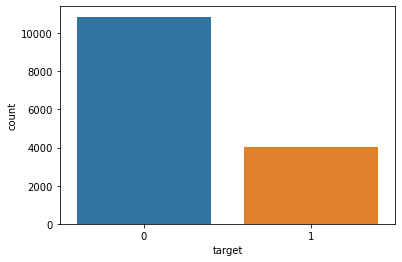

In [37]:
sns.countplot(x = 'target', data = df)

Text(0.5, 1.0, 'percentage of target peptide by peptide length')

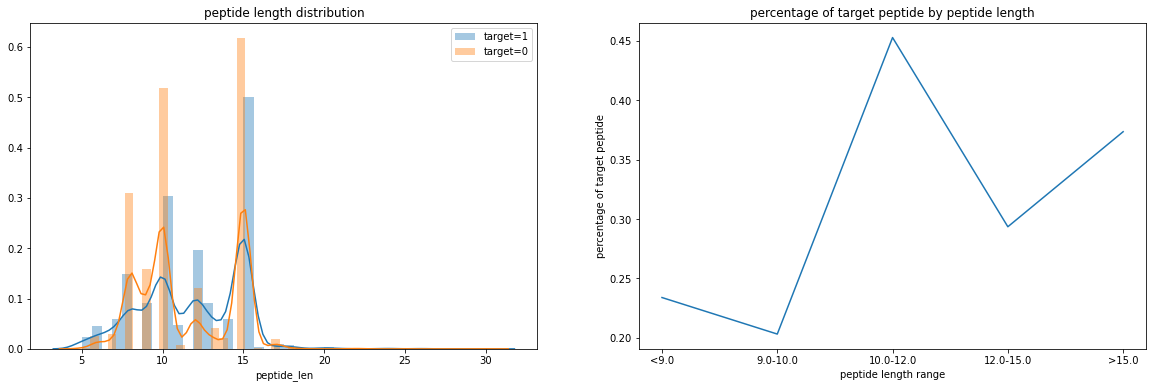

In [86]:
# compare distribution of peptide length
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target[df_target['peptide_len']<=30]['peptide_len'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget[df_nontarget['peptide_len']<=30]['peptide_len'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('peptide length distribution')
peptide_len = df[['peptide_len','target']]
peptide_len['length range'] = pd.qcut(peptide_len['peptide_len'],5,labels=['<9.0','9.0-10.0','10.0-12.0','12.0-15.0','>15.0'])
ax[1].plot(peptide_len.groupby('length range')['target'].mean())
ax[1].set_xlabel('peptide length range')
ax[1].set_ylabel('percentage of target peptide')
ax[1].set_title('percentage of target peptide by peptide length')

In [92]:
df['chou_fasman'].describe()

count    14896.000000
mean         0.994906
std          0.123667
min          0.534000
25%          0.913000
50%          0.991000
75%          1.073000
max          1.546000
Name: chou_fasman, dtype: float64

Text(0.5, 1.0, 'average chou fasman by target')

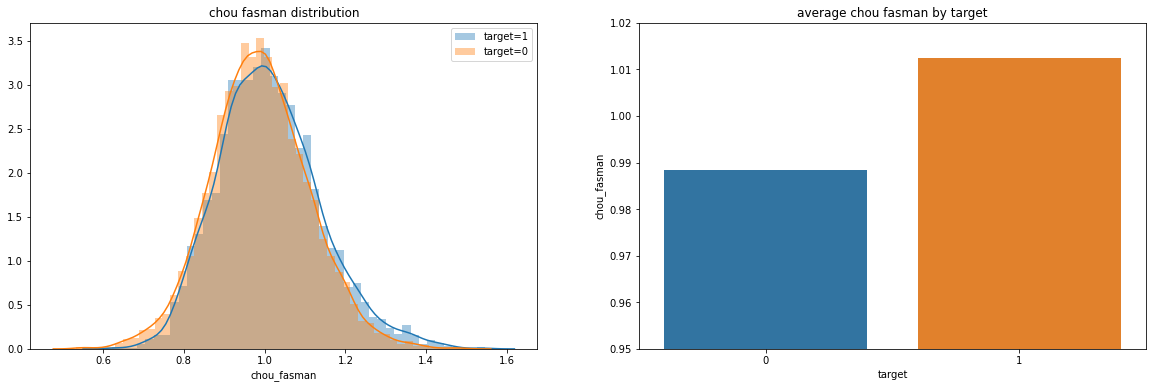

In [100]:
# compare chou fasman
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['chou_fasman'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['chou_fasman'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('chou fasman distribution')
pep_bychou = df.groupby('target')['chou_fasman'].mean().reset_index()
sns.barplot(x = pep_bychou['target'],y=pep_bychou['chou_fasman'])
ax[1].set_ylim(0.95,1.02)
ax[1].set_title('average chou fasman by target')

In [104]:
df['emini'].describe()

count    14896.000000
mean         1.074277
std          1.736873
min          0.000000
25%          0.244000
50%          0.551000
75%          1.207000
max         40.605000
Name: emini, dtype: float64

Text(0.5, 1.0, 'average emini by target')

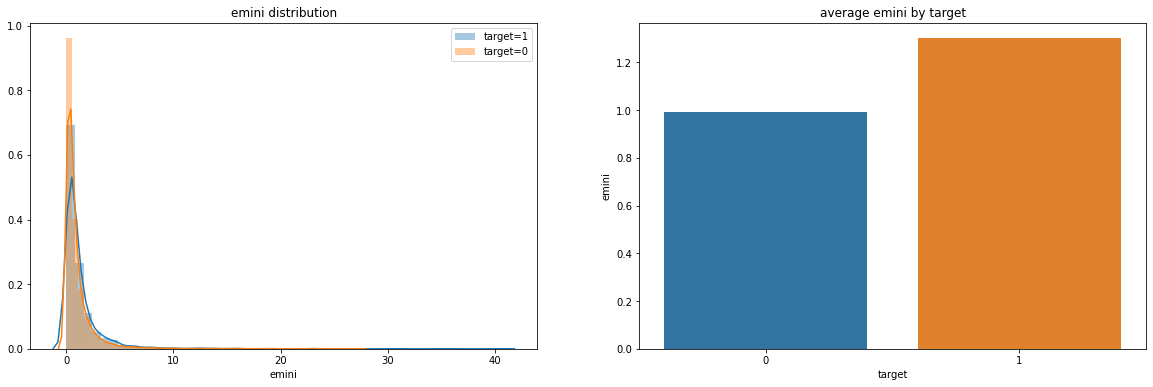

In [115]:
# compare emini
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['emini'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['emini'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_byemini = df.groupby('target')['emini'].mean().reset_index()
sns.barplot(x = pep_byemini['target'],y=pep_byemini['emini'])
ax[1].set_title('average emini by target')

In [107]:
df['kolaskar_tongaonkar'].describe()

count    14896.000000
mean         1.021807
std          0.053430
min          0.838000
25%          0.987000
50%          1.021000
75%          1.055000
max          1.255000
Name: kolaskar_tongaonkar, dtype: float64

(1.0, 1.03)

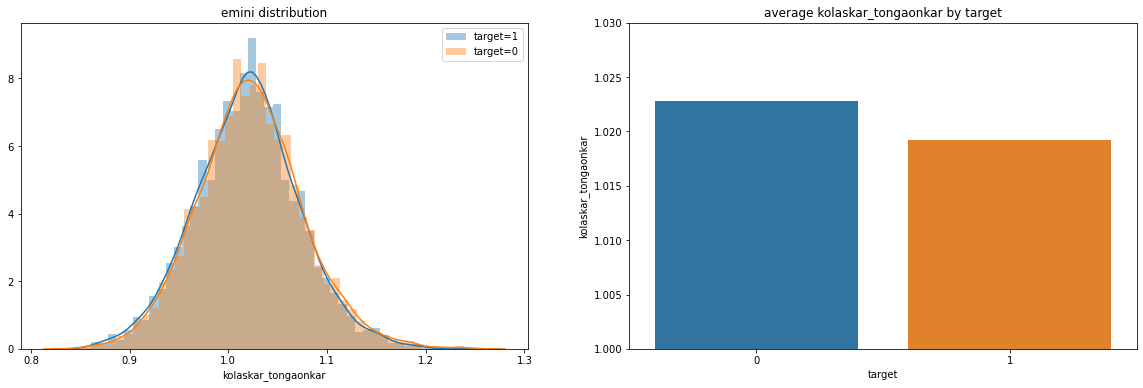

In [114]:
# compare kolaskar_tongaonkar
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['kolaskar_tongaonkar'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['kolaskar_tongaonkar'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_bykol = df.groupby('target')['kolaskar_tongaonkar'].mean().reset_index()
sns.barplot(x = pep_bykol['target'],y=pep_bykol['kolaskar_tongaonkar'])
ax[1].set_title('average kolaskar_tongaonkar by target')
ax[1].set_ylim(1.0,1.03)

In [121]:
df['parker'].describe()

count    14896.000000
mean         1.749920
std          1.955039
min         -9.029000
25%          0.600000
50%          1.775000
75%          2.962000
max          9.120000
Name: parker, dtype: float64

(1.6, 1.9)

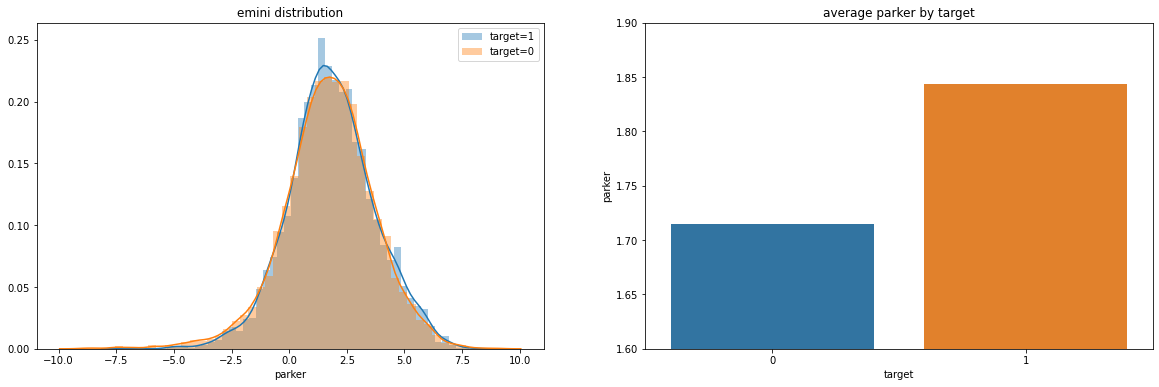

In [120]:
# compare parker
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['parker'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['parker'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('emini distribution')
pep_byparker = df.groupby('target')['parker'].mean().reset_index()
sns.barplot(x = pep_byparker['target'],y=pep_byparker['parker'])
ax[1].set_title('average parker by target')
ax[1].set_ylim(1.6,1.9)

## Parent Protein Features

In [125]:
df['isoelectric_point'].describe()

count    14896.000000
mean         7.016036
std          1.875898
min          3.686096
25%          5.569763
50%          6.447815
75%          8.676575
max         12.232727
Name: isoelectric_point, dtype: float64

(5.0, 8.0)

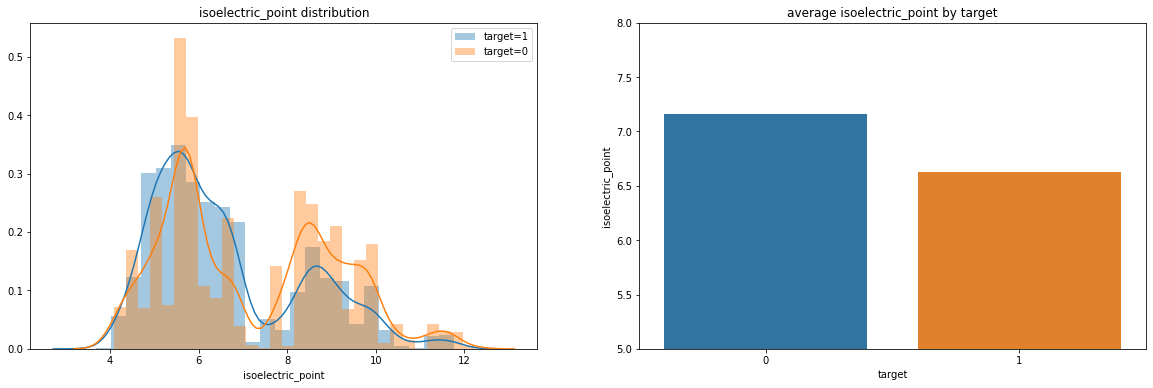

In [124]:
# compare isoelectric_point
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['isoelectric_point'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['isoelectric_point'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('isoelectric_point distribution')
pep_byiso = df.groupby('target')['isoelectric_point'].mean().reset_index()
sns.barplot(x = pep_byiso['target'],y=pep_byiso['isoelectric_point'])
ax[1].set_title('average isoelectric_point by target')
ax[1].set_ylim(5,8)

In [130]:
df['aromaticity'].describe()

count    14896.000000
mean         0.077128
std          0.026377
min          0.000000
25%          0.062500
50%          0.075949
75%          0.093458
max          0.182254
Name: aromaticity, dtype: float64

(0.07, 0.08)

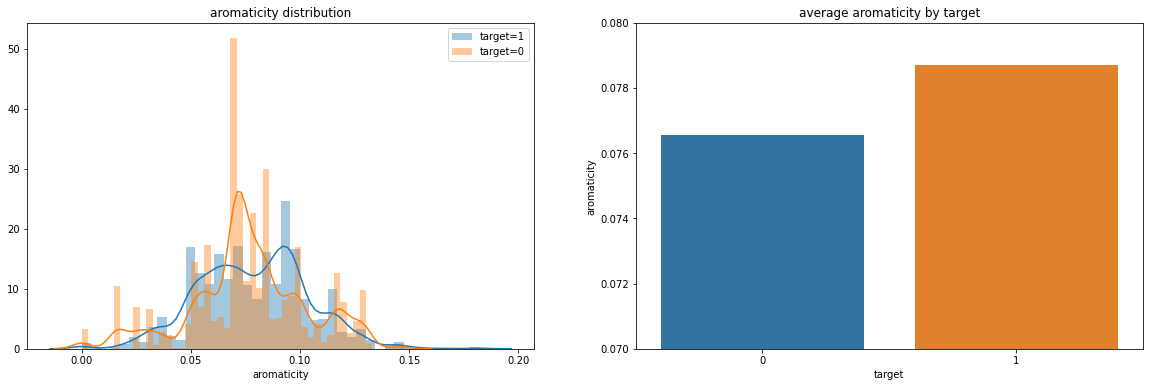

In [129]:
# compare aromaticity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['aromaticity'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['aromaticity'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('aromaticity distribution')
pep_byar = df.groupby('target')['aromaticity'].mean().reset_index()
sns.barplot(x = pep_byar['target'],y=pep_byar['aromaticity'])
ax[1].set_title('average aromaticity by target')
ax[1].set_ylim(0.07,0.08)

In [133]:
df['hydrophobicity'].describe()

count    14896.000000
mean        -0.394228
std          0.392888
min         -1.971171
25%         -0.600131
50%         -0.318259
75%         -0.189591
max          1.267089
Name: hydrophobicity, dtype: float64

Text(0.5, 1.0, 'average hydrophobicity by target')

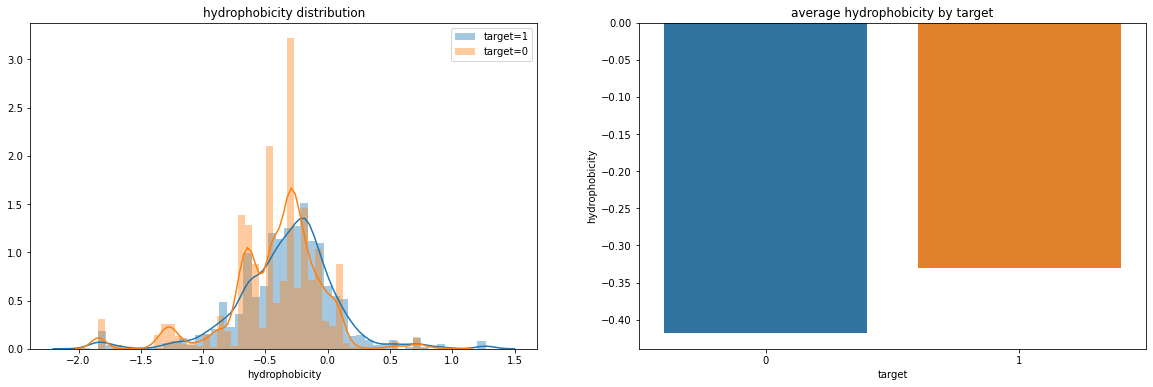

In [132]:
# compare hydrophobicity
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['hydrophobicity'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['hydrophobicity'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('hydrophobicity distribution')
pep_byhy = df.groupby('target')['hydrophobicity'].mean().reset_index()
sns.barplot(x = pep_byhy['target'],y=pep_byhy['hydrophobicity'])
ax[1].set_title('average hydrophobicity by target')

In [135]:
df['stability'].describe()

count    14896.000000
mean        43.343509
std         16.505895
min          5.448936
25%         31.725753
50%         41.984246
75%         49.101172
max        137.046667
Name: stability, dtype: float64

(40.0, 45.0)

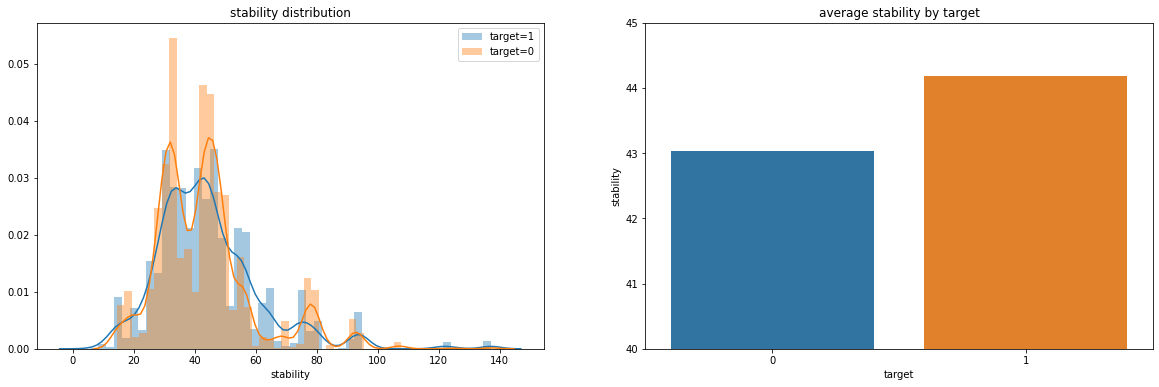

In [138]:
# compare stability
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
sns.distplot(df_target['stability'],ax=ax[0],label='target=1')
sns.distplot(df_nontarget['stability'],ax=ax[0],label='target=0')
ax[0].legend()
ax[0].set_title('stability distribution')
pep_bystab = df.groupby('target')['stability'].mean().reset_index()
sns.barplot(x = pep_bystab['target'],y=pep_bystab['stability'])
ax[1].set_title('average stability by target')
ax[1].set_ylim(40,45)

## Correlation

In [142]:
corr_df = df[['peptide_len','chou_fasman','emini','kolaskar_tongaonkar','parker','isoelectric_point','aromaticity','hydrophobicity','stability','target']].corr()

<AxesSubplot:>

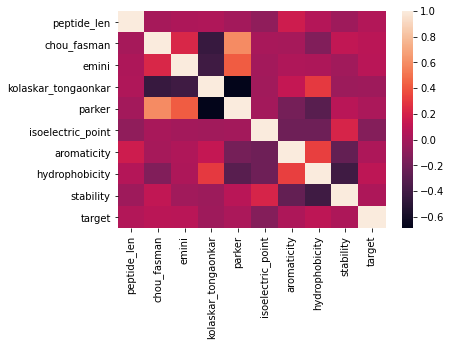

In [143]:
sns.heatmap(corr_df)